# 📊 Netflix Content Analysis



## 📌 Project Overview
This project aims to analyze Netflix’s content strategy by examining factors such as content type, language, release season, and timing. By identifying the best-performing content and analyzing release trends, this study provides insights into how Netflix optimizes audience engagement throughout the year.




## 🎯 Objective
The goal is to understand how various factors like content type, language, release season, and timing affect viewership patterns. By analyzing the best-performing content and the timing of its release, we aim to uncover insights into how Netflix maximizes audience engagement throughout the year.


## 📂 Dataset Information
The dataset contains information about Netflix content, including:
- **Title**: Name of the movie/show.  
- **Available Globally?**: Indicates if the content is accessible worldwide.  
- **Release Date**: The date when the content was released.  
- **Hours Viewed**: Total watch hours (needs cleaning).  
- **Language Indicator**: The primary language of the content.  
- **Content Type**: Whether it’s a movie or a show.  

## 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## 2️⃣ Load and Preview Data
The dataset used in this analysis can be accessed here:  
[Netflix Content 2023 Dataset](https://statso.io/netflix-content-strategy-case-study/)


### 📂 Load Dataset

In [2]:
df = pd.read_csv("netflix_content_2023.csv")

### 🔍 Preview Data

In [3]:
# Display first five rows
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [5]:
# Summary statistics
df.describe()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
count,24812,24812,8166,24812,24812,24812
unique,19158,2,1783,889,6,2
top,The Night Agent: Season 1,No,2020-03-20,"1,00,000",English,Movie
freq,2,17162,28,4046,17268,14104


## 3️⃣ Data Cleaning
Before analysis, the dataset is cleaned by:

In [6]:
# Convert 'Hours Viewed' to numeric after removing commas
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [7]:
# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

## 4️⃣ Exploratory Data Analysis (EDA)

### 🔹 Top 10 Most Watched Shows/Movies

C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yp199\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from c

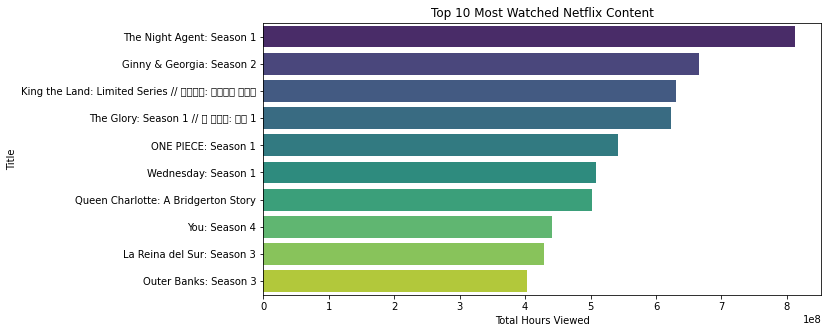

In [8]:
top_10 = df.nlargest(10, 'Hours Viewed')
plt.figure(figsize=(10, 5))
sns.barplot(x='Hours Viewed', y='Title', data=top_10, palette='viridis')
plt.title("Top 10 Most Watched Netflix Content")
plt.xlabel("Total Hours Viewed")
plt.ylabel("Title")
plt.show()

### 🔹 Content Type Distribution

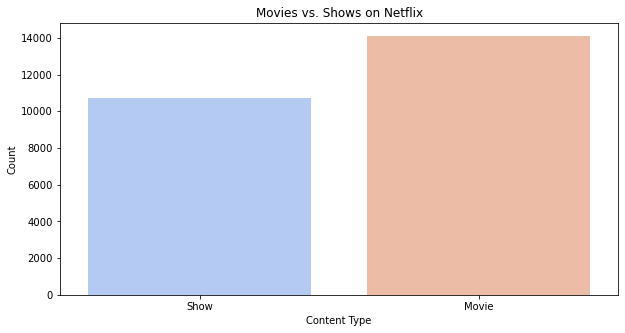

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Content Type', data=df, palette='coolwarm')
plt.title("Movies vs. Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

### 🔹 Aggregate Viewership Hours by Release Month

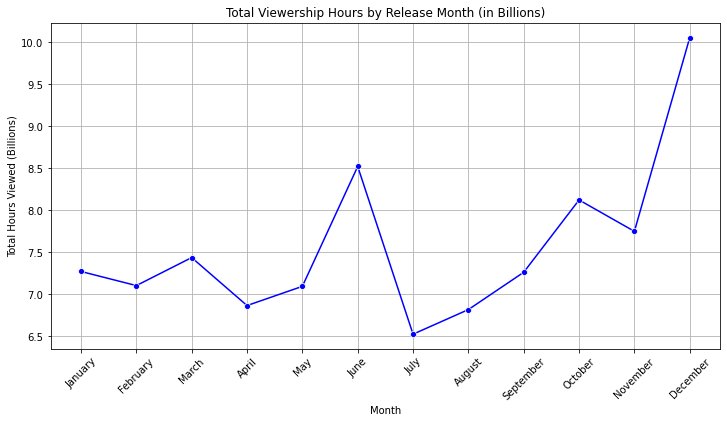

In [10]:
# Extract month name from release date
df['Release Month'] = df['Release Date'].dt.strftime('%B')

# Aggregate viewership hours by month and convert to billions
df['Hours Viewed'] = df['Hours Viewed'] / 1e9  # Convert to billions
monthly_viewership = df.groupby('Release Month', observed=False)['Hours Viewed'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_viewership['Release Month'] = pd.Categorical(monthly_viewership['Release Month'], categories=month_order, ordered=True)
monthly_viewership = monthly_viewership.sort_values('Release Month')

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='Hours Viewed', data=monthly_viewership, marker='o', color='b')
plt.title("Total Viewership Hours by Release Month (in Billions)")
plt.xlabel("Month")
plt.ylabel("Total Hours Viewed (Billions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 🔹 Aggregate Viewership Hours by Content Type and Release Month

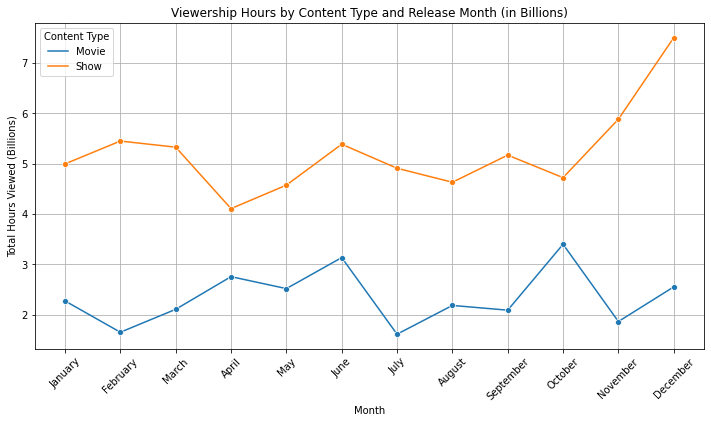

In [11]:
# Aggregate viewership by content type and release month
df_grouped = df.groupby(['Content Type', 'Release Month'], observed=False)['Hours Viewed'].sum().reset_index()

# Sort months in calendar order
df_grouped['Release Month'] = pd.Categorical(df_grouped['Release Month'], categories=month_order, ordered=True)
df_grouped = df_grouped.sort_values(['Content Type', 'Release Month'])

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Month', y='Hours Viewed', hue='Content Type', data=df_grouped, marker='o')
plt.title("Viewership Hours by Content Type and Release Month (in Billions)")
plt.xlabel("Month")
plt.ylabel("Total Hours Viewed (Billions)")
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

### 💡 Total Viewership Hours by Release Season

In [12]:
# Define Seasons Based on Release Months
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['Season'] = df['Release Date'].dt.month.map(season_mapping)

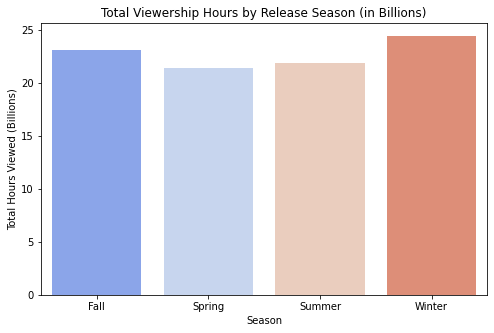

In [13]:
# Total Viewership Hours by Release Season
seasonal_viewership = df.groupby('Season')['Hours Viewed'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Hours Viewed', data=seasonal_viewership, palette='coolwarm')
plt.title("Total Viewership Hours by Release Season (in Billions)")
plt.xlabel("Season")
plt.ylabel("Total Hours Viewed (Billions)")
plt.show()

### 💡 Aggregate Viewership Hours by Language

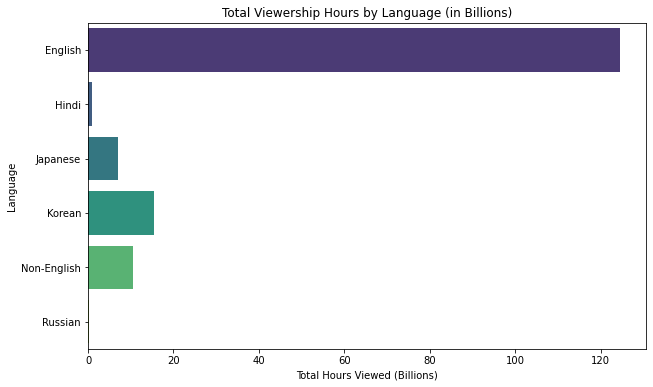

In [14]:
language_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours Viewed', y='Language Indicator', data=language_viewership, palette='viridis')
plt.title("Total Viewership Hours by Language (in Billions)")
plt.xlabel("Total Hours Viewed (Billions)")
plt.ylabel("Language")
plt.show()

### 💡 Monthly Release Patterns and Viewership Hours


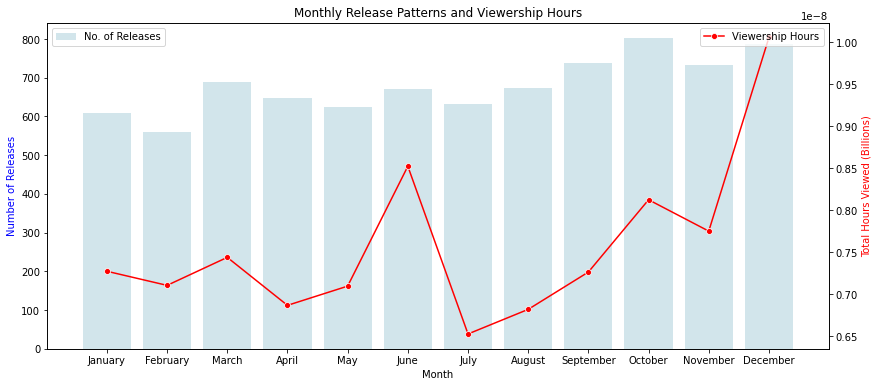

In [15]:
df['Release Month'] = df['Release Date'].dt.strftime('%B')
df['Hours Viewed'] = df['Hours Viewed'] / 1e9  # Convert to billions
monthly_data = df.groupby('Release Month', observed=False).agg(
    Release_Count=('Title', 'count'),
    Hours_Viewed=('Hours Viewed', 'sum')
).reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['Release Month'] = pd.Categorical(monthly_data['Release Month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('Release Month')

# Plot Monthly Data
fig, ax1 = plt.subplots(figsize=(14, 6))
sns.barplot(x='Release Month', y='Release_Count', data=monthly_data, ax=ax1, color='lightblue', alpha=0.6, label='No. of Releases')
ax2 = ax1.twinx()
sns.lineplot(x='Release Month', y='Hours_Viewed', data=monthly_data, ax=ax2, marker='o', color='red', label='Viewership Hours')
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Releases", color='blue')
ax2.set_ylabel("Total Hours Viewed (Billions)", color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Monthly Release Patterns and Viewership Hours")
plt.xticks(rotation=45)
plt.show()

### 💡 Weekly Release Patterns and Viewership Hours

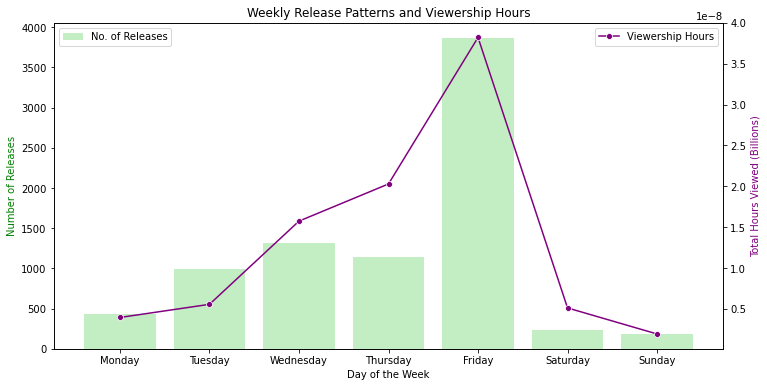

In [16]:
df['Release Day'] = df['Release Date'].dt.strftime('%A')
weekly_data = df.groupby('Release Day', observed=False).agg(
    Release_Count=('Title', 'count'),
    Hours_Viewed=('Hours Viewed', 'sum')
).reset_index()

# Sort days in order
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data['Release Day'] = pd.Categorical(weekly_data['Release Day'], categories=week_order, ordered=True)
weekly_data = weekly_data.sort_values('Release Day')

# Plot Weekly Data
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Release Day', y='Release_Count', data=weekly_data, ax=ax1, color='lightgreen', alpha=0.6, label='No. of Releases')
ax2 = ax1.twinx()
sns.lineplot(x='Release Day', y='Hours_Viewed', data=weekly_data, ax=ax2, marker='o', color='purple', label='Viewership Hours')
ax1.set_xlabel("Day of the Week")
ax1.set_ylabel("Number of Releases", color='green')
ax2.set_ylabel("Total Hours Viewed (Billions)", color='purple')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("Weekly Release Patterns and Viewership Hours")
plt.xticks(rotation=45)
plt.show()

## 5️⃣ Statistical Analysis

### 💡Correlation Analysis
Is there a relationship between the release year and viewing hours?

In [17]:
# Calculate Pearson correlation
correlation = df['Release Date'].dt.year.corr(df['Hours Viewed'])
print(f"Pearson Correlation: {correlation}")



Pearson Correlation: 0.19794354679556125


#### Insights
- The correlation between `Release Year` and `Hours Viewed` is **0.19**, indicating a weak positive relationship. Newer releases tend to have slightly higher viewing hours.
- The line plot shows that total viewing hours have increased over the years, with a significant spike in **2023**.

### 💡 Hypothesis Testing
We will perform a two-sample t-test to compare the average hours viewed between two groups:

1. English Content
2. Non-English Content

Hypotheses:

**Null Hypothesis (H₀):** There is no difference in the average hours viewed between English and non-English content.

**Alternative Hypothesis (H₁):** There is a significant difference in the average hours viewed between English and non-English content.

In [18]:
# Split the data into English and non-English content
english_content = df[df['Language Indicator'] == 'English']
non_english_content = df[df['Language Indicator'] != 'English']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(english_content['Hours Viewed'], non_english_content['Hours Viewed'], equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 10.424839769247214
P-value: 2.2544754606207e-25


#### Result: 
The t-statistic of *10.42* indicates a large difference between the means of the two groups (English and non-English content). The p-value of *2.25* is greater than the typical significance level of *0.05*, which means **we fail to reject the null hypothesis**.

#### Insight: 
There is no statistically significant difference in the average hours viewed between English and non-English content. This suggests that both English and non-English content perform similarly in terms of viewership on Netflix.